# dataset reference  - Vehicle dataset - CAR DETAILS FROM CAR DEKHO.csv
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data


In this jupyter notebook i have shown the removal of outliers from the feature "selling price" can increase the R2 score(train_set) of the ML model(Linear Regression).
Objective to check the R2 score of dataset["selling price"] without and with outliers 

importing all the needed libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


 ## Familiarization with the dataset, checking for data types, missing values, and basic statistics.

In [285]:
raw_data=pd.read_csv("CAR_DEKHO.csv")     #load the raw dataset 

In [286]:
raw_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [287]:
raw_data.info()   # (4340,8)         8 features/columns and entries/rows 4340

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


The data has more features that is object type so have to use labelencoder for this.

In [288]:
raw_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Its a non-null dataset

In [289]:
# raw_data.info(),raw_data
raw_data.describe() #summary statistics

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [290]:

# Calculate Q1 and Q3
Q1 = raw_data['selling_price'].quantile(0.25)
Q3 = raw_data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in special price
outliers_sellingprice = raw_data[(raw_data['selling_price'] < lower_bound) | (raw_data['selling_price'] > upper_bound)]
data_na_outliers_sellingprice=raw_data[(raw_data['selling_price'] >= lower_bound) & (raw_data['selling_price'] <= upper_bound)]
outliers_per_selling=outliers_sellingprice.shape[0]/raw_data.shape[0]*100
print("Outlier percentage for selling price Feature is _______________",outliers_per_selling,"%")


Outlier percentage for selling price Feature is _______________ 6.244239631336406 %


In [291]:
data_na_outliers_sellingprice

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


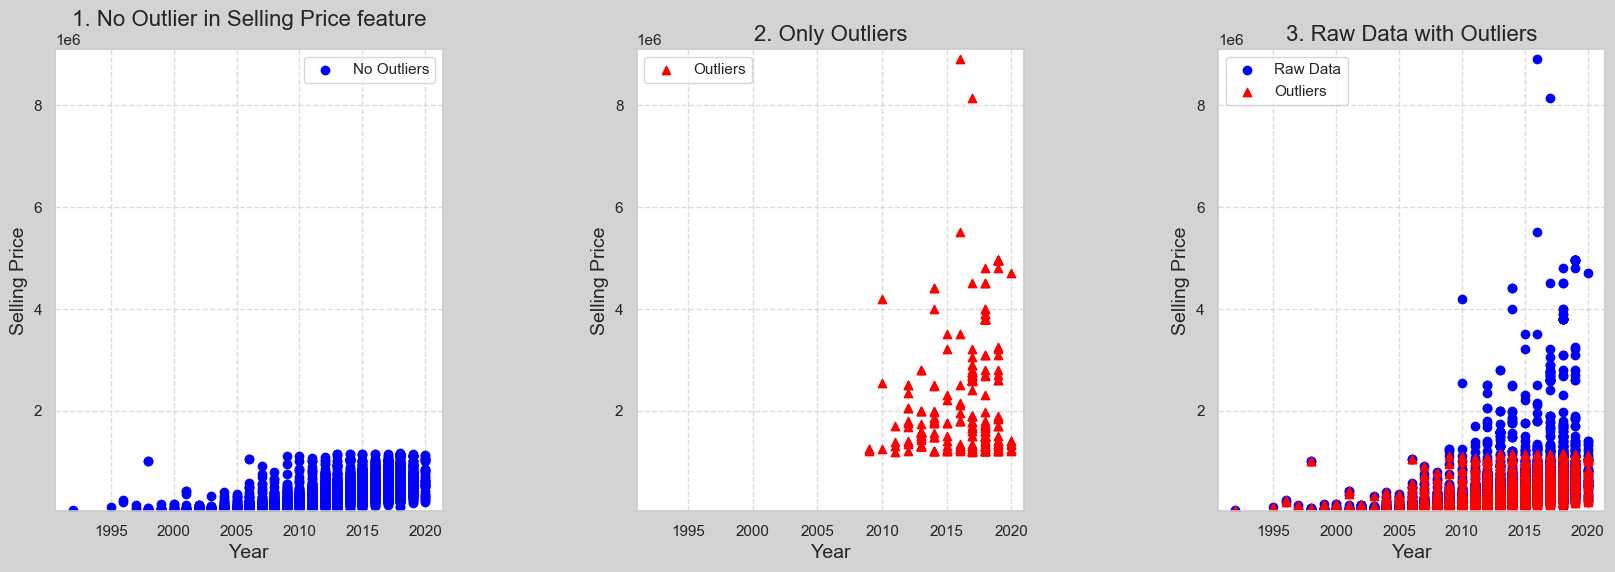

In [292]:
# Set a style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), facecolor='lightgrey')

# Plot on the first subplot
axs[0].scatter(data_na_outliers_sellingprice['year'], data_na_outliers_sellingprice['selling_price'], 
                marker='o', color='blue', label='No Outliers')
axs[0].set_title('1. No Outlier in Selling Price feature', fontsize=16)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Selling Price', fontsize=14)
axs[0].set_ylim(raw_data['selling_price'].min() - 1, raw_data['selling_price'].max() + 200000)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()

# Plot on the second subplot
axs[1].scatter(outliers_sellingprice['year'], outliers_sellingprice['selling_price'], 
                marker='^', color='red', label='Outliers')
axs[1].set_title('2. Only Outliers', fontsize=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Selling Price', fontsize=14)
axs[1].set_xlim(raw_data['year'].min() - 1, raw_data['year'].max() + 1)
axs[1].set_ylim(raw_data['selling_price'].min() - 1, raw_data['selling_price'].max() + 200000)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()

# Plot on the third subplot
axs[2].scatter(raw_data['year'], raw_data['selling_price'], 
                marker='o', color='blue', label='Raw Data')
axs[2].scatter(data_na_outliers_sellingprice['year'], data_na_outliers_sellingprice['selling_price'], 
                marker='^', color='red', label='Outliers')
axs[2].set_ylim(raw_data['selling_price'].min() - 1, raw_data['selling_price'].max() + 200000)
axs[2].set_title('3. Raw Data with Outliers', fontsize=16)
axs[2].set_xlabel('Year', fontsize=14)
axs[2].set_ylabel('Selling Price', fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.7)
axs[2].legend()



# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

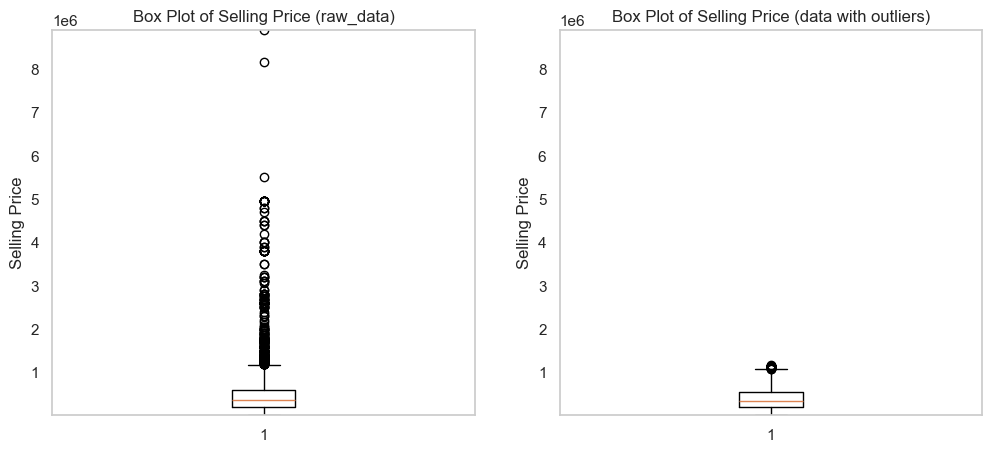

In [293]:
# sns.boxplot(x=raw_data['selling_price'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].boxplot(raw_data['selling_price'])
axs[0].set_title('Box Plot of Selling Price (raw_data)')
axs[0].set_ylabel('Selling Price')
axs[0].set_ylim(raw_data['selling_price'].min() - 1, raw_data['selling_price'].max() + 1)

axs[0].grid()
axs[1].boxplot(data_na_outliers_sellingprice['selling_price'])
axs[1].set_title('Box Plot of Selling Price (data with outliers)')
axs[1].set_ylabel('Selling Price')
axs[1].set_ylim(raw_data['selling_price'].min() - 1, raw_data['selling_price'].max() + 1)
axs[1].grid()

## Preprocessing

In [294]:
data_na_outliers_sellingprice

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [295]:
data_na_outliers_sellingprice['fuel'].value_counts()

fuel
Petrol      2092
Diesel      1913
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [296]:
data_na_outliers_sellingprice['transmission'].value_counts()

transmission
Manual       3812
Automatic     257
Name: count, dtype: int64

In [297]:
data_na_outliers_sellingprice['seller_type'].value_counts()
data_na_outliers_sellingprice['owner'].value_counts()

owner
First Owner             2598
Second Owner            1082
Third Owner              294
Fourth & Above Owner      81
Test Drive Car            14
Name: count, dtype: int64

In [298]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with categorical data
fuel_encoding = pd.DataFrame({'fuel': ['Petrol', 'Diesel', 'CNG']})
seller_encoding = pd.DataFrame({'seller_type': ['Dealer', 'Individual']})
transmission_encoding = pd.DataFrame({'transmission': ['Manual', 'Automatic']})
owner_encoding = pd.DataFrame({'owner': ['First Owner', 'First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car']})
owner_encoding

,owner
0,First Owner
1,First Owner
2,Second Owner
3,Third Owner
4,Fourth & Above Owner
5,Test Drive Car


In [ ]:
lab_enc=LabelEncoder()
data_na_outliers_sellingprice['fuel']=lab_enc.fit_transform(data_na_outliers_sellingprice['fuel'])
data_na_outliers_sellingprice['seller_type']=lab_enc.fit_transform(data_na_outliers_sellingprice['seller_type'])
data_na_outliers_sellingprice['transmission']=lab_enc.fit_transform(data_na_outliers_sellingprice['transmission'])
data_na_outliers_sellingprice['owner']=lab_enc.fit_transform(data_na_outliers_sellingprice['owner'])

In [300]:
data_na_outliers_sellingprice

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


## Build Model


In [301]:
x=data_na_outliers_sellingprice.drop(['name','selling_price'],axis=1)
y=data_na_outliers_sellingprice['selling_price']

In [302]:
x

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2
...,...,...,...,...,...,...
4335,2014,80000,1,1,1,2
4336,2014,80000,1,1,1,2
4337,2009,83000,4,1,1,2
4338,2016,90000,1,1,1,0


In [303]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4069, dtype: int64

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train



,year,km_driven,fuel,seller_type,transmission,owner
3089,2013,31800,1,0,1,0
2532,2018,10980,4,0,0,0
1747,2013,37000,1,0,1,0
1715,2020,101,4,0,1,3
3974,2015,30000,4,1,1,0
...,...,...,...,...,...,...
1240,2016,25000,4,1,1,0
1413,2004,120000,1,1,1,0
943,2017,9748,4,0,1,0
3745,2013,40000,4,1,1,2


In [305]:
x_test

,year,km_driven,fuel,seller_type,transmission,owner
3960,2013,88000,1,1,1,2
3611,2012,235000,1,1,1,2
1585,2010,110000,4,1,1,0
1205,2014,40000,4,1,1,2
2608,2017,70000,4,1,1,2
...,...,...,...,...,...,...
1907,2015,92198,4,0,1,2
3927,2017,40000,1,1,1,0
107,2010,100000,1,1,1,0
2160,2005,170000,4,1,1,4


In [306]:
y_train

3089    495000
2532    525000
1747    525000
1715    635000
3974    800000
         ...  
1240    300000
1413    170000
943     550000
3745    250000
3395    229999
Name: selling_price, Length: 3255, dtype: int64

In [307]:
y_test

3960    430000
3611    434999
1585    130000
1205    351000
2608    600000
         ...  
1907    225000
3927    650000
107     600000
2160     70000
1868    530000
Name: selling_price, Length: 814, dtype: int64

using Linear regression model 

In [308]:
lin_reg=LinearRegression()

In [309]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [310]:
train_predict=lin_reg.predict(x_train)
test_predict=lin_reg.predict(x_test)


In [311]:
r2_score=metrics.r2_score(y_train,train_predict)

In [312]:
r2_score
# y_test.i/nfo()

0.49844087045175467

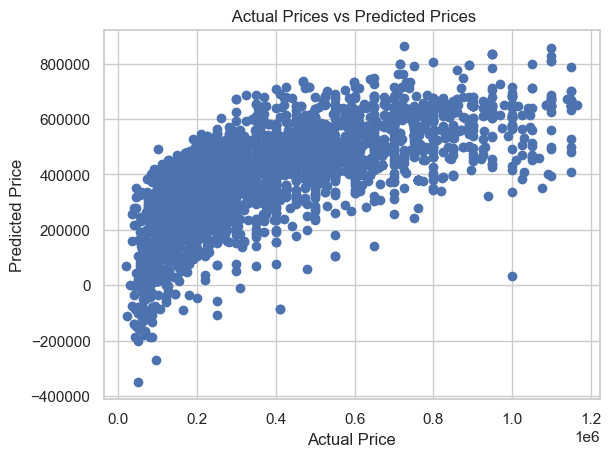

In [313]:
plt.scatter(y_train, train_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Checking R2 score with raw_data with outliers in feature"selling price"

In [314]:

# Create a sample dataframe with categorical data
fuel_encoding = pd.DataFrame({'fuel': ['Petrol', 'Diesel', 'CNG']})
seller_encoding = pd.DataFrame({'seller_type': ['Dealer', 'Individual']})
transmission_encoding = pd.DataFrame({'transmission': ['Manual', 'Automatic']})
owner_encoding = pd.DataFrame({'owner': ['First Owner', 'First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car']})
owner_encoding




lab_enc=LabelEncoder()
raw_data['fuel']=lab_enc.fit_transform(raw_data['fuel'])
raw_data['seller_type']=lab_enc.fit_transform(raw_data['seller_type'])
raw_data['transmission']=lab_enc.fit_transform(raw_data['transmission'])
raw_data['owner']=lab_enc.fit_transform(raw_data['owner'])


xx=raw_data.drop(['name','selling_price'],axis=1)
yy=raw_data['selling_price']
xx_train,xx_test,yy_train,yy_test = train_test_split(xx,yy,test_size=0.2,random_state=42)
xx_train



,year,km_driven,fuel,seller_type,transmission,owner
227,2017,20000,1,1,1,0
964,2018,50000,1,1,1,0
2045,2013,25000,4,1,1,2
1025,2011,70000,1,1,1,0
4242,2017,72000,1,0,1,0
...,...,...,...,...,...,...
3444,2006,50000,1,1,1,0
466,2011,80000,1,1,1,0
3092,2016,51000,1,0,1,0
3772,2013,80000,1,1,1,0


In [315]:
lin_reg=LinearRegression()
lin_reg.fit(xx_train,yy_train)

LinearRegression()

In [316]:
train_predict=lin_reg.predict(xx_train)

In [320]:
r2_scoree=metrics.r2_score(yy_train,train_predict)
r2_scoree # with outlier

0.4608851899472246

In [321]:
r2_score # without outlier

0.49844087045175467

Conclusion 
as the results show the removing outlier does effect the r2 score here it incresed by removing outliers in the dataset
